In [ ]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

### Ejemplo

Determinar los extremos absolutos de $f(x)=x^2-2x+5$ en $\left[0,3\right]$.

Obtenemos los puntos críticos de $f$ en $\left[0,3\right]$:

In [ ]:
x=sym.var('x')
def f(x):
  return x**2-2*x+5
f(x)

x**2 - 2*x + 5

In [ ]:
df=sym.diff(f(x))
c=sym.solve(df,x)
c

[1]

In [ ]:
puntos=np.array([0,1,3]) #puntos a evaluar

In [ ]:
f(puntos) #como c=1, el punto crítico (c) por ser el más pequeño es un mínimo

array([5, 4, 8])

### Actividad
Determinar los valores extremos absolutos de  $f(x) = (x-3)^2(x+3)^2$ en el intervalo $[1,\,4]$, usando `sympy`. Mostrar en una gráfica.

In [ ]:
def f(x):
  return (x-3)**2*(x+3)**2
f(x)

(x - 3)**2*(x + 3)**2

In [ ]:
df=f(x).diff()
c=sym.solve(df,x)
c #de ellos, sólo 3 está dentro del dominio [1,4], por lo que lo utilizo: c(2)

[-3, 0, 3]

In [ ]:
puntos=np.array([1,c[2],4])
f(puntos)

array([64, 0, 49], dtype=object)

In [ ]:
x_n=np.linspace(0,5,400) #rango de números para graficar
y_n=f(x_n)

Text(-3, 5, '(-3,0)')

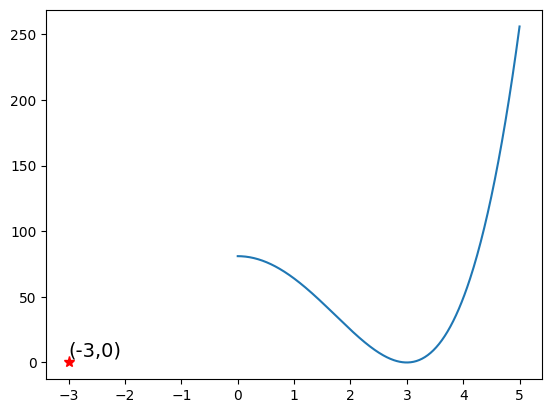

In [ ]:
plt.plot(x_n,y_n)
plt.plot(c[0],f(c[0]),'r*',ms=8)
plt.text(c[0],f(c[0])+5, f'({c[0]},{f(c[0])})', fontsize =14)

### Cambio de librerías
Uso de funciones entre librerías `NumPy` y `SymPy`

$$
f(x)=e^{-x}\cos(2x),
$$
para $x\in[-1,1]$.

In [ ]:
#Definimos F como una variable y sin utilizar el entorno 'def'
x=sym.var('x')
f=sym.exp(-x)*sym.cos(2*x) #Usamos funciones exponencial y coseno de SymPy
f

exp(-x)*cos(2*x)

In [ ]:
#derivamos:
df=f.diff()
df

-2*exp(-x)*sin(2*x) - exp(-x)*cos(2*x)

In [ ]:
#Buscar puntos críticos:
c=sym.solve(df,x)
c[0],float(c[0]) #convertimos el punto crítico a flotante

(-atan(1/2)/2, -0.23182380450040305)

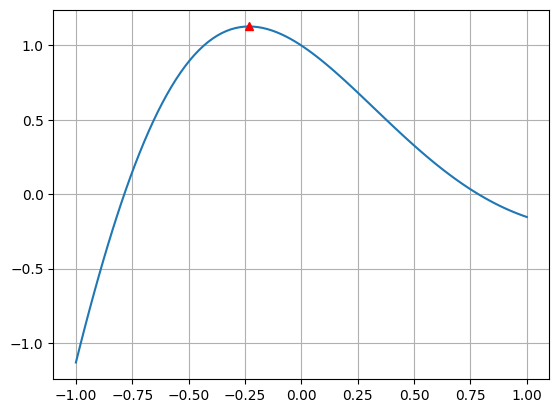

In [ ]:
#Graficamos
#Para eso, convertimos la variable simbólica 'f' a una función que acepte arreglos de NumPy
f_num=sym.lambdify(x,f,'numpy')

x_num=np.linspace(-1,1,100)
y_num=f_num(x_num)
plt.plot(x_num,y_num)
plt.plot(float(c[0]),f_num(float(c[0])),'r^') #convertimos el punto crítico a float
plt.grid()

In [ ]:
#Usamos funciones de NumPy
def f(x):
  return np.exp(-x)*np.cos(2*x)

``` python
 sym.diff(f(x),x) #Esto marca error
 ```

### Otra función a optimizar (con puntos críticos complejos)
$$
f(x)=(x^2+1)^2(x-1)^2
$$

In [ ]:
#Como f(x)está expresado en potencias, nos conviene usar el entorno 'def'
def f(x):
  return (x**2+1)**2*(x-1)**2

f(x)

(x - 1)**2*(x**2 + 1)**2

In [ ]:
#Buscamos puntos críticos
df=sym.diff(f(x),x)
c=sym.solve(df,x)
c

[1, -I, I, 1/3 - sqrt(2)*I/3, 1/3 + sqrt(2)*I/3]

In [ ]:
x=sym.var('x',real=True) #definimos la variable simbólica, sólo con números reales
df=sym.diff(f(x),x)
c=sym.solve(df,x)  #Así encuentro los puntos críticos reales
c

[1]

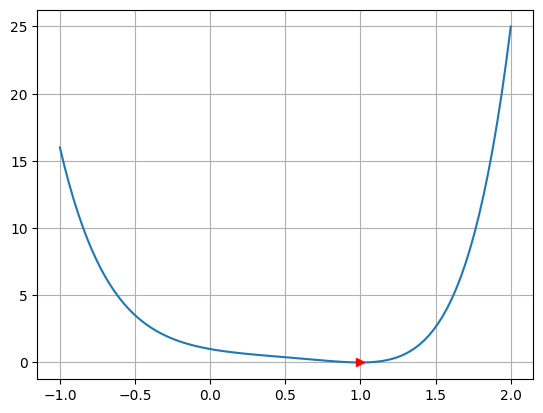

In [ ]:
x_num=np.linspace(-1,2,100)
plt.plot(x_num,f(x_num))
plt.plot(c[0],f(c[0]),'r>')
plt.grid()

In [ ]:
#Observando la gráfica puedo concluir que x=1 es un mínimo de f(x)
f(c[0])

0

---
1. **Resistencia de una viga**  Una viga de madera tiene una sección transversal rectangular de altura $h$ y ancho $w$. La resistencia $S$ de la viga es directamente proporcional al ancho y al cuadrado de su altura ($S=kwh^2$, donde $k$ es una constante de proporcionalidad). ¿Cuáles son las dimensiones de la viga más fuerte que puede cortarse a partir de un leño redondo de $24$ pulgadas de diámetro?

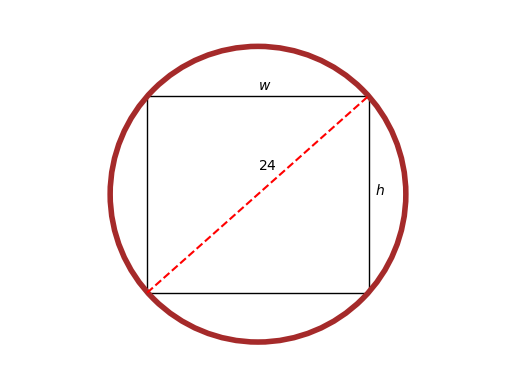

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

C = patches.Circle((0, 0),12, fill=False,color='brown',lw=4)
S = patches.Rectangle((-9,-8),18,16,fill=False,color='k')
ax = plt.gca()
ax.add_artist(S)
ax.add_artist(C)

plt.text(0,8.5,'$w$')
plt.text(9.5,0,'$h$')

plt.plot([-9,9],[-8,8],'r--')
plt.text(0,2,'$24$')

plt.axis('equal')
plt.ylim([-15,15])
plt.axis('off')
plt.show()

In [ ]:
#Maximizar S=kwh**2
#Son dos variables: w y h
#Observo que w y h forman un triángulo de hipotenusa=24
# 24**2=h^2+w^2
#h^2=24**2-w^2

$$ \max_{w}S(W)=\max_ww(24^2-w^2), $$
para $w$ positivo y $<24$.

In [ ]:
k=1.3e4
def S(w):
  return k*w*(24**2-w**2)
w=sym.var('w',positive=True)
S(w)

13000.0*w*(576 - w**2)

In [ ]:
dS=sym.diff(S(w),w)
c=sym.solve(dS,w)
c

[13.8564064605510]

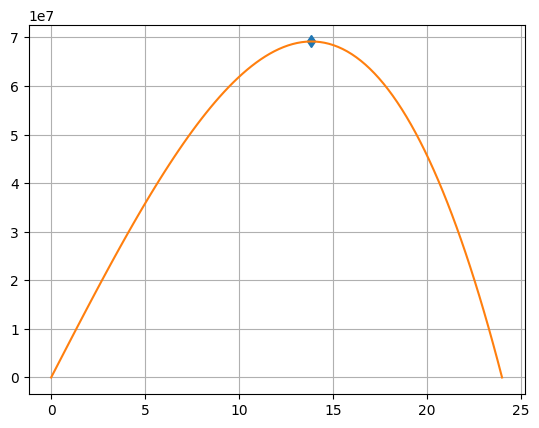

In [ ]:
plt.plot(c[0],S(c[0]),'d')
w_num=np.linspace(0,24,100)
plt.plot(w_num,S(w_num))
plt.grid()

In [ ]:
#Calculamos la altura
(24**2-c[0]**2)**0.5 #Teorema de Pitágoras

19.5959179422654

In [ ]:
#Resistencia máxima obtenida
S(c[0])

69171181.0510707

**Resultado:**

Las dimensiones óptimas son $w=13.8564$ y $h=19.5959$ pulgadas, obreniendo una resistencia máxima de $69171181$ unidades de resistencia.

---

10/09/2025

---
2. **Iluminación**  Una fuente luminosa se localiza sobre el centro de una mesa circular de $4 pies$ de diámetro. Encontrar la altura $h$ de la fuente luminosa de modo tal que la iluminación $I$ en el perímetro de la mesa sea máxima si $I=k(\sin \alpha)/s^2$, donde $s$ es la altura oblicua, $\alpha$ es el ángulo al cual la luz incide sobre la mesa y $k$ es una constante (El valor de esta última constante es irrelevante para el problema, ya que no se pide el valor de la iluminación).

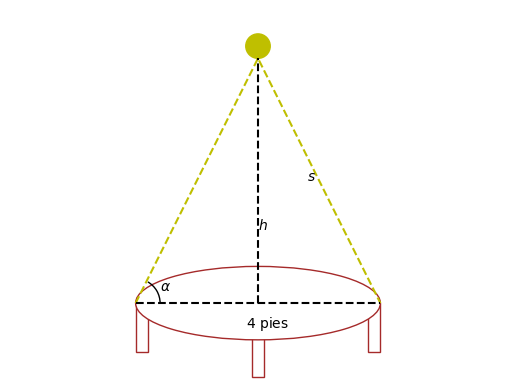

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
E = patches.Ellipse((0, 0),10, 3,fc='white',ec='brown')
C = patches.Circle((0,10.5),0.5,color='y')
a = patches.Arc((-5,0),2,2,theta2=60)
p1 = patches.Rectangle((-5, -2),0.5, 2, fill=False,color='brown')
p2 = patches.Rectangle((4.5, -2),0.5, 2, fill=False,color='brown')
p3 = patches.Rectangle((-0.25, -3),0.5, 2, fill=False,color='brown')
ax = plt.gca()
ax.add_artist(p1)
ax.add_artist(p2)
ax.add_artist(p3)
ax.add_artist(E)
ax.add_artist(C)
ax.add_artist(a)

plt.text(2,5,'$s$')
plt.text(0,3,'$h$')
plt.text(-4,0.5,r'$\alpha$')
plt.text(-0.5,-1,'$4$ pies')

plt.plot([-5,0,5],[0,10,0],'y--')
plt.plot([-5,5],[0,0],'k--')
plt.plot([0,0],[0,10],'k--')


plt.axis('equal')
plt.ylim([-3.1,12])
plt.axis('off')
plt.show()

_**Deducción del criterio de optimización**_

Se desea maximizar la iluminación
$$
\max I=\max k\frac{\sin(\alpha)}{s^2},
$$
donde, a partir del teorema de pitágoras, se sabe que $s^2=2^2+h^2$ y que por definición $\sin(\alpha)=\frac{h}{s}$; sistituyendo $s$ en ambas ecuaciones, se obtiene
$$\max_hI=\max_hk\frac{h}{\sqrt{2^2+h^2}(2^2+h^2)}
$$
para $h>0$.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

In [8]:
#Para usar el entorno 'def' y no convertir la función simbólica a numérica, escribimos la raíz cuadrada como potencia (**0.5)
#Quedando el denominador de la iluminación como potencia de 1.5

def I(h):
  k=1.5e3
  return k*h/((2**2+h**2)**1.5)

h=sym.var('h',positive=True)
I(h)

1500.0*h/(h**2 + 4)**1.5

In [11]:
dI=sym.diff(I(h),h) #I(h).diff()
c=sym.solve(dI,h)
c #punto crítico

[1.41421356237310]

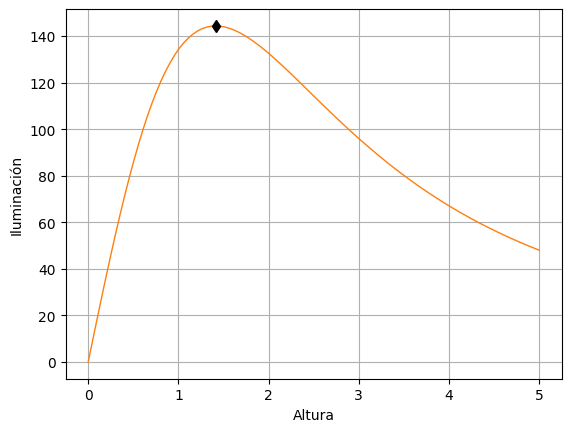

In [13]:
#Gráfica
h_num=np.linspace(0,5,100)
plt.plot(h_num,I(h_num),'C1',lw=1)
plt.plot(c[0],I(c[0]),'dk')
plt.ylabel('Iluminación')
plt.xlabel('Altura')
plt.grid()

In [14]:
I(c[0]) #Iluminación máxima (lx)

144.337567297406

In [ ]:
#math hace referencia al lenguaje matemático, rm a romano para ponerlo derecho y ya no en itálicas.

_**Respuesta:**_

La altura óptima es $h=1.4142\;\mathrm{ft}$, consiguiendo una iluminación máxima de $I=144.34\;\mathrm{lx}$.
___

3. **Fuerza mínima**  Se diseña un componente para deslizar un bloque de acero con peso $W=10 N$ a través de una mesa y sobre una canaleta. Se opone al movimiento del bloque una fuerza de fricción proporcional a su peso aparente (sea $k=0.1$ la constante de proporcionalidad). Determinar la fuerza mínima $f$ necesaria para deslizar el bloque y encontrar el valor correspondiente de $\theta$.

Ayudín: $f\cos \theta$ es la fuerza de dirección del movimiento, y $f\sin\theta$ es la fuerza que tiende a levantar el bloque. De tal modo, el peso aparente del bloque es $W-f\sin\theta$.

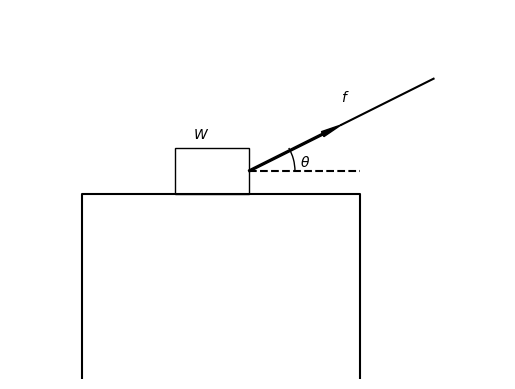

In [15]:
W = patches.Rectangle((0, 2),0.8, 0.5, fill=False,color='k')
a = patches.Arrow(0.8,2.25,1,0.5,width=0.1,color='k')
arc = patches.Arc((0.8,2.25),1,1,theta2=30)
ax = plt.gca()
ax.add_artist(W)
ax.add_artist(a)
ax.add_artist(arc)

plt.text(0.2,2.6,'$W$')
plt.text(1.8,3,'$f$')
plt.text(1.35,2.305,r'$\theta$')

plt.plot([1.8,2.8],[2.75,3.25],'k')
plt.plot([0.8,2],[2.25,2.25],'k--')
plt.plot([-1,-1,2,2],[0,2,2,0],'k')


plt.axis('equal')
plt.ylim([0,4])
plt.axis('off')
plt.show()

_**Deducción del problema**_
Para encontrar la fuerza mínima en función del ángulo $\theta$, se iguala la componente horizontal de la fuerza $f$ a la fricción entre la mesa y el bloque $W$
$$
k(W-f\sin(\theta))=f\cos(\theta),
$$
que despejado resulta en:
$$
\min_\theta f=\min_theta\frac{kE}{\cos(\theta)+k\sin(\theta)},
$$
para $0<\theta<\pi/2$.

In [16]:
#Como el criterio de optimización tiene funciones trigonométricas, me conviene definir la fuerza 'f' como variable simbólica:
th=sym.var('theta')
k=0.1 #Del problema sé que k=0.1
W=10 #W= 10 N
f=k*W/(sym.cos(th)+k*sym.sin(th))
f

1.0/(0.1*sin(theta) + cos(theta))

In [17]:
df=sym.diff(f,th)
c=sym.solve(df,th)
c

[0.0996686524911620]

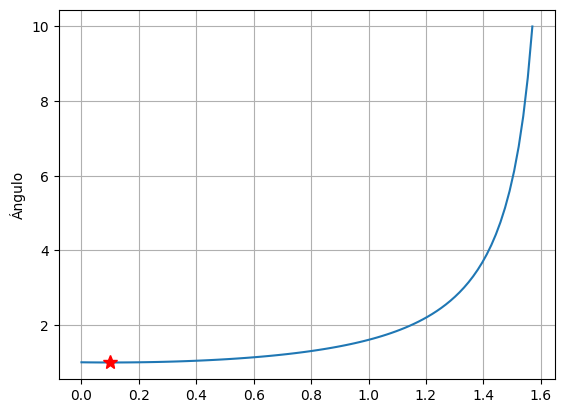

In [18]:
th_num=np.linspace(0,np.pi/2,100)
f_num=sym.lambdify(th,f,'numpy') #conversión de función simbólica 'f' a función numérica
plt.plot(th_num,f_num(th_num))
plt.plot(c[0],f.subs(th,c[0]),'r*',ms=10) #Sustituímos th por el valor óptimo c
plt.ylabel('fuerza')
plt.ylabel('Ángulo')
plt.grid()

In [19]:
f.subs(th,c[0]) #La fuerza mínima

0.995037190209989

_**Respuesta:**_
El ángulo que minimiza la fuerza es $\theta=0.995\mathrm\

**Volumen de una caja**  Para elavorar una caja, una fábrica dispone de láminas de cartón cuadradas de 13 unidades por lado, a las cuales se les recorta un cuadrado en cada extremo. ¿Qué longitud debe tener el del cuadrado del recorte para que la caja costruida contenga el máximo volumen posible?


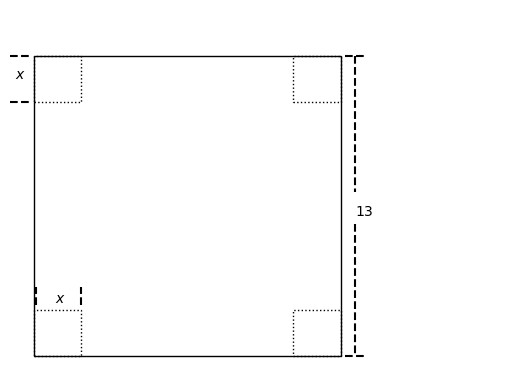

In [20]:
from matplotlib import patches
S1 = patches.Rectangle((0, 0),13,13, fill=False,color='k')
c1 = patches.Rectangle((11,0),2,2,fill=False,color='k',ls=':')
c2 = patches.Rectangle((0,0),2,2,fill=False,color='k',ls=':')
c3 = patches.Rectangle((11,11),2,2,fill=False,color='k',ls=':')
c4 = patches.Rectangle((0,11),2,2,fill=False,color='k',ls=':')
ax = plt.gca()
ax.add_artist(S1)
ax.add_artist(c1)
ax.add_artist(c2)
ax.add_artist(c3)
ax.add_artist(c4)

plt.text(-0.8,12,'$x$')
plt.plot([-1,-0.2],[11,11],'k--')
plt.plot([-1,-0.2],[13,13],'k--')
plt.text(0.9,2.3,'$x$')
plt.plot([0.1,0.1],[2.2,3],'k--')
plt.plot([2,2],[2.2,3],'k--')

plt.plot([13.2,14],[0,0],'k--')
plt.plot([13.2,14],[13,13],'k--')
plt.plot([13.6,13.6],[13,7.1],'k--')
plt.text(13.6,6.1,'$13$')
plt.plot([13.6,13.6],[5.7,0],'k--')

plt.axis([-1,20,-1,15])
#plt.axis('equal')
plt.axis('off')
plt.show()

El volumen de la caja está dado por $V=l^2x$, donde $l$ es lado. Por el problema sabemos que $l=13-2x$. $$V=(13-2x)^2x$$
para $x<13$ y positiva.

In [ ]:
#Terminar, está en fotos.